In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load CSV dataset
file_path = r'C:\Users\David\Documents\2019-2020_CSV\Data_Sheet\pumf_cchs.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


   ADM_RNO1   VERDATE     REFPER  GEOGPRV  GEODGHR4  DHH_SEX  DHHGMS  \
0      1000  20240531  2019-2020     47.0   47906.0      2.0     1.0   
1    100005  20240531  2019-2020     47.0   47906.0      1.0     1.0   
2    100012  20240531  2019-2020     59.0   59914.0      2.0     2.0   
3    100015  20240531  2019-2020     13.0   13904.0      1.0     2.0   
4    100018  20240531  2019-2020     46.0   46903.0      1.0     2.0   

   DHHDGHSZ  ADM_PRX  DHHGAGE  ...  FSCDVHF2  INCG015  INCDGHH  INCDGRCA  \
0       2.0      2.0      3.0  ...       0.0      1.0      5.0       4.0   
1       2.0      2.0      5.0  ...       0.0      2.0      4.0       2.0   
2       1.0      2.0      5.0  ...       6.0      2.0      2.0       1.0   
3       1.0      2.0      5.0  ...       0.0      2.0      3.0       3.0   
4       1.0      2.0      4.0  ...       0.0      2.0      1.0       1.0   

   INCDGRPR  INCDGRRS  ADM_040  ADM_045  ADM_050   WTS_M  
0       4.0       4.0      1.0      1.0      6.0  7

In [23]:
print(df.shape,df.info)

(108252, 691) <bound method DataFrame.info of         ADM_RNO1   VERDATE     REFPER  GEOGPRV  GEODGHR4  DHH_SEX  DHHGMS  \
0           1000  20240531  2019-2020     47.0   47906.0      2.0     1.0   
1         100005  20240531  2019-2020     47.0   47906.0      1.0     1.0   
2         100012  20240531  2019-2020     59.0   59914.0      2.0     2.0   
3         100015  20240531  2019-2020     13.0   13904.0      1.0     2.0   
4         100018  20240531  2019-2020     46.0   46903.0      1.0     2.0   
...          ...       ...        ...      ...       ...      ...     ...   
108247    999964  20240531  2019-2020     11.0   11900.0      2.0     1.0   
108248    999967  20240531  2019-2020     35.0   35962.0      2.0     2.0   
108249    999976  20240531  2019-2020     13.0   13901.0      1.0     2.0   
108250    999980  20240531  2019-2020     59.0   59942.0      1.0     1.0   
108251    999998  20240531  2019-2020     47.0   47905.0      1.0     2.0   

        DHHDGHSZ  ADM_PRX  DH

## Question 4: How Does Cannabis Use Impact Stress Levels? 
Interested Varibles:
* GEN_020: perceived life stress, discrete 1-5
* GEN_025: work stress, discrete 1-5 
* CAN_015: cannabis use, discrete 1-2 


In [298]:
df_q4=df.copy()
df_q4=df_q4.filter(items=['GEN_020','GEN_025','CAN_015'])
print(df_q4.head())

   GEN_020  GEN_025  CAN_015
0      2.0      2.0      2.0
1      3.0      6.0      2.0
2      3.0      6.0      2.0
3      3.0      6.0      2.0
4      4.0      6.0      2.0


In [300]:
df_q4.to_csv('Question 4.csv',index=False)

In [302]:
df_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108252 entries, 0 to 108251
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   GEN_020  108252 non-null  float64
 1   GEN_025  108252 non-null  float64
 2   CAN_015  108252 non-null  float64
dtypes: float64(3)
memory usage: 2.5 MB


In [304]:
df_q4.describe()

,GEN_020,GEN_025,CAN_015
count,108252.000000,108252.000000,108252.000000
mean,2.595324,4.833509,2.326350
std,1.060638,1.667734,1.821908
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000
50%,3.000000,6.000000,2.000000
75%,3.000000,6.000000,2.000000
max,8.000000,9.000000,9.000000


In [306]:
df_q4.dtypes

GEN_020    float64
GEN_025    float64
CAN_015    float64
dtype: object

In [308]:
df_q4.isnull().sum() #check for missing values

GEN_020    0
GEN_025    0
CAN_015    0
dtype: int64

In [310]:
df_q4[['CAN_015','GEN_020','GEN_025']]=df_q4[['CAN_015','GEN_020','GEN_025']].astype(int) #Converts Cannabis Use CAN_015, GEN_020, GEN_025 into integer type.
df_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108252 entries, 0 to 108251
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   GEN_020  108252 non-null  int32
 1   GEN_025  108252 non-null  int32
 2   CAN_015  108252 non-null  int32
dtypes: int32(3)
memory usage: 1.2 MB


In [312]:
df_q4=df_q4.drop(df_q4[df_q4['GEN_020']==7].index)
df_q4=df_q4.drop(df_q4[df_q4['GEN_020']==8].index)

In [314]:
df_q4=df_q4.drop(df_q4[df_q4['GEN_025']==6].index)
df_q4=df_q4.drop(df_q4[df_q4['GEN_025']==7].index)
df_q4=df_q4.drop(df_q4[df_q4['GEN_025']==8].index)
df_q4=df_q4.drop(df_q4[df_q4['GEN_025']==9].index)

In [316]:
df_q4=df_q4.drop(df_q4[df_q4['CAN_015']==7].index)
df_q4=df_q4.drop(df_q4[df_q4['CAN_015']==8].index)
df_q4=df_q4.drop(df_q4[df_q4['CAN_015']==9].index)

In [318]:
df_q4.describe()

,GEN_020,GEN_025,CAN_015
count,41455.000000,41455.000000,41455.000000
mean,2.898685,2.967845,1.743915
std,0.938867,1.002772,0.436475
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000
75%,3.000000,4.000000,2.000000
max,5.000000,5.000000,2.000000


In [344]:
df4_stress=df_q4.groupby('GEN_020', as_index=False)['CAN_015'].value_counts(normalize=True,sort=False)
display(df4_stress)

,GEN_020,CAN_015,proportion
0,1,1,0.185408
1,1,2,0.814592
2,2,1,0.245941
3,2,2,0.754059
4,3,1,0.256540
5,3,2,0.743460
6,4,1,0.284748
7,4,2,0.715252
8,5,1,0.309837
9,5,2,0.690163


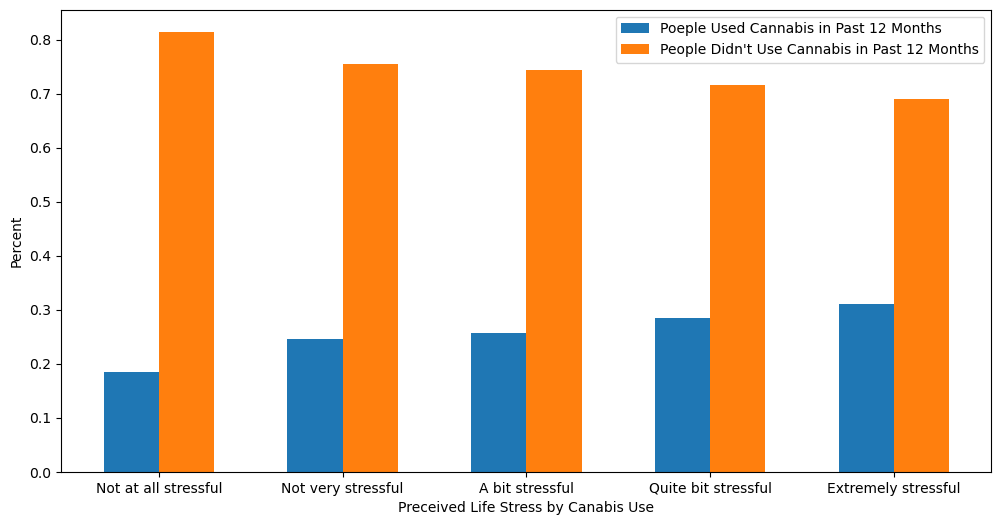

In [348]:
plt.figure(figsize=(12, 6))
plt.bar(df4_stress['GEN_020'].unique(),df4_stress['proportion'][::2],width=0.3,label='Poeple Used Cannabis in Past 12 Months')
plt.bar(df4_stress['GEN_020'].unique()+0.3,df4_stress['proportion'][1::2],width=0.3, label="People Didn't Use Cannabis in Past 12 Months")
plt.xticks(df4_stress['GEN_020'].unique()+0.3/2,('Not at all stressful','Not very stressful','A bit stressful','Quite bit stressful','Extremely stressful'))
plt.xlabel('Preceived Life Stress by Canabis Use')
plt.ylabel('Percent')
plt.legend()
plt.show()

In [326]:
df4_stress=df_q4.groupby('GEN_025', as_index=False)['CAN_015'].value_counts(normalize=True,sort=False)
display(df4_stress)

,GEN_025,CAN_015,proportion
0,1,1,0.231662
1,1,2,0.768338
2,2,1,0.252304
3,2,2,0.747696
4,3,1,0.254231
5,3,2,0.745769
6,4,1,0.265249
7,4,2,0.734751
8,5,1,0.285915
9,5,2,0.714085


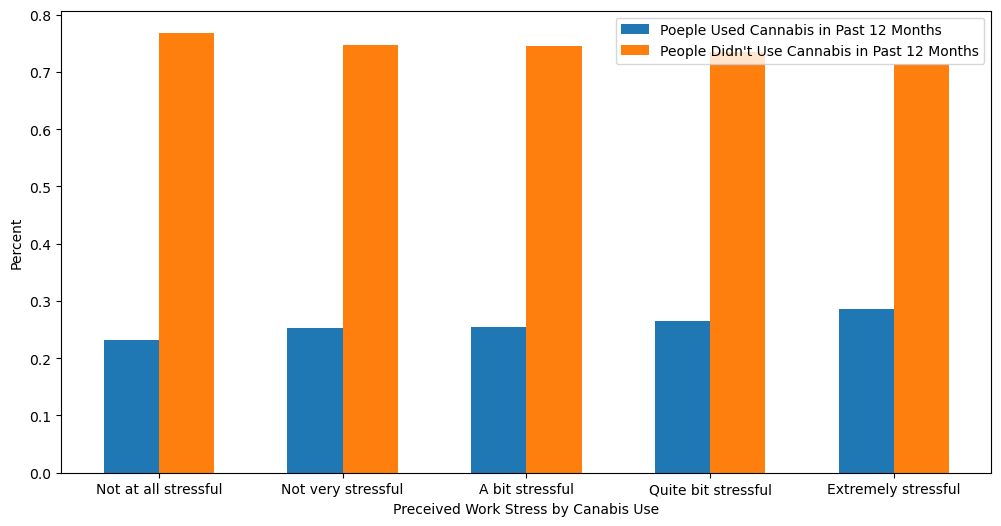

In [340]:
plt.figure(figsize=(12, 6))
plt.bar(df4_stress['GEN_025'].unique(),df4_stress['proportion'][::2],width=0.3,label='Poeple Used Cannabis in Past 12 Months')
plt.bar(df4_stress['GEN_025'].unique()+0.3,df4_stress['proportion'][1::2],width=0.3, label="People Didn't Use Cannabis in Past 12 Months")
plt.xticks(df4_stress['GEN_025'].unique()+0.3/2,('Not at all stressful','Not very stressful','A bit stressful','Quite bit stressful','Extremely stressful'))
plt.xlabel('Preceived Work Stress by Canabis Use')
plt.ylabel('Percent')
plt.legend()
plt.show()

## Question 5: Which Demographic Groups (age, sex, region) Are Most Affected by Health Barriers? 
Interested Varibles:

* CAN_015: cannabis use  * 
SMK_005: smoking status (type of smoker* * 

SMK_060: smoking habits (stopped smoki4(*  

ALC_015: frequency of alcohol use in 12 m -* 07 

ALC_020: 5+/4+ drinks on one occasion frequency (binge dr
   discre
* DHHGAGE: agee * 1-5
* 
DHH_te* , 1
* 

GEOGPRV: province and region ii
* isc
*   

EHG2DVH3: Highest level 1-3  01-06  

In [25]:
df_q5=df.copy()
df_q5=df_q5.filter(items=['CAN_015','SMK_005','SMMK_060','ALC_015','ALC_020','DHHGAGE','DHH_SEX','GEOGPRV','EHG2DVH3'])
print(df_q5.head())

   CAN_015  SMK_005  ALC_015  ALC_020  DHHGAGE  DHH_SEX  GEOGPRV  EHG2DVH3
0      2.0      3.0      5.0      3.0      3.0      2.0     47.0       3.0
1      2.0      3.0      1.0      1.0      5.0      1.0     47.0       2.0
2      2.0      3.0     96.0     96.0      5.0      2.0     59.0       1.0
3      2.0      3.0     96.0     96.0      5.0      1.0     13.0       1.0
4      2.0      3.0     96.0     96.0      4.0      1.0     46.0       3.0


In [27]:
df_q5.to_csv('Question 5.csv',index=False)

In [29]:
df_q5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108252 entries, 0 to 108251
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CAN_015   108252 non-null  float64
 1   SMK_005   108252 non-null  float64
 2   ALC_015   108252 non-null  float64
 3   ALC_020   108252 non-null  float64
 4   DHHGAGE   108252 non-null  float64
 5   DHH_SEX   108252 non-null  float64
 6   GEOGPRV   108252 non-null  float64
 7   EHG2DVH3  108252 non-null  float64
dtypes: float64(8)
memory usage: 6.6 MB


In [31]:
df_q5.describe()

,CAN_015,SMK_005,ALC_015,ALC_020,DHHGAGE,DHH_SEX,GEOGPRV,EHG2DVH3
count,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000
mean,2.326350,2.988859,28.728975,27.678306,3.825324,1.544729,34.405683,3.001912
std,1.821908,1.256760,41.177029,41.984238,1.293388,0.497998,15.260020,1.565288
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000
25%,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,24.000000,3.000000
50%,2.000000,3.000000,5.000000,2.000000,4.000000,2.000000,35.000000,3.000000
75%,2.000000,3.000000,96.000000,96.000000,5.000000,2.000000,47.000000,3.000000
max,9.000000,9.000000,99.000000,99.000000,5.000000,2.000000,60.000000,9.000000


In [33]:
df_q5.dtypes

CAN_015     float64
SMK_005     float64
ALC_015     float64
ALC_020     float64
DHHGAGE     float64
DHH_SEX     float64
GEOGPRV     float64
EHG2DVH3    float64
dtype: object

In [35]:
df_q5.isnull().sum() #check for missing values

CAN_015     0
SMK_005     0
ALC_015     0
ALC_020     0
DHHGAGE     0
DHH_SEX     0
GEOGPRV     0
EHG2DVH3    0
dtype: int64

## Data Cleaning

In [37]:
df_q5=df_q5.drop(df_q5[df_q5['CAN_015']==7].index)
df_q5=df_q5.drop(df_q5[df_q5['CAN_015']==8].index)
df_q5=df_q5.drop(df_q5[df_q5['CAN_015']==9].index)

In [39]:
df_q5=df_q5.drop(df_q5[df_q5['SMK_005']==7].index)
df_q5=df_q5.drop(df_q5[df_q5['SMK_005']==8].index)
df_q5=df_q5.drop(df_q5[df_q5['SMK_005']==9].index)

In [41]:
df_q5=df_q5.drop(df_q5[df_q5['ALC_015']==96].index)
df_q5=df_q5.drop(df_q5[df_q5['ALC_015']==97].index)
df_q5=df_q5.drop(df_q5[df_q5['ALC_015']==98].index)
df_q5=df_q5.drop(df_q5[df_q5['ALC_015']==99].index)

In [43]:
df_q5=df_q5.drop(df_q5[df_q5['ALC_020']==96].index)
df_q5=df_q5.drop(df_q5[df_q5['ALC_020']==97].index)
df_q5=df_q5.drop(df_q5[df_q5['ALC_020']==98].index)
df_q5=df_q5.drop(df_q5[df_q5['ALC_020']==99].index)

In [45]:
df_q5=df_q5.drop(df_q5[df_q5['EHG2DVH3']==9].index)

In [396]:
df_q5['CAN_015'] = df_q5['CAN_015'].astype(int)
df_q5['GEOGPRV'].dtypes

dtype('int32')

In [394]:
df_q5['SMK_005'] = df_q5['SMK_005'].astype(int)
df_q5['SMK_005'].dtypes

dtype('int32')

In [392]:
df_q5['ALC_015'] = df_q5['ALC_015'].astype(int)
df_q5['ALC_015'].dtypes

dtype('int32')

In [390]:
df_q5['ALC_020'] = df_q5['ALC_020'].astype(int)
df_q5['ALC_020'].dtypes

dtype('int32')

In [388]:
df_q5['DHH_SEX'] = df_q5['DHH_SEX'].astype(int)
df_q5['DHH_SEX'].dtypes

dtype('int32')

In [386]:
df_q5['DHHGAGE'] = df_q5['DHHGAGE'].astype(int)
df_q5['DHHGAGE'].dtypes

dtype('int32')

In [384]:
df_q5['GEOGPRV'] = df_q5['GEOGPRV'].astype(int)
df_q5['GEOGPRV'].dtypes

dtype('int32')

In [382]:
df_q5['EHG2DVH3'] = df_q5['EHG2DVH3'].astype(int)
df_q5['EHG2DVH3'].dtypes

dtype('int32')

In [398]:
df_q5.describe()

,CAN_015,SMK_005,ALC_015,ALC_020,DHHGAGE,DHH_SEX,GEOGPRV,EHG2DVH3
count,68451.000000,68451.000000,68451.000000,68451.000000,68451.000000,68451.000000,68451.000000,68451.000000
mean,1.818206,2.785496,3.589590,1.882135,3.859929,1.532585,34.535887,2.725044
std,0.385678,0.599774,1.969969,1.303493,1.183679,0.498941,14.976920,0.572897
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000
25%,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,24.000000,3.000000
50%,2.000000,3.000000,4.000000,1.000000,4.000000,2.000000,35.000000,3.000000
75%,2.000000,3.000000,5.000000,2.000000,5.000000,2.000000,47.000000,3.000000
max,2.000000,3.000000,7.000000,6.000000,5.000000,2.000000,60.000000,3.000000


In [400]:
df5_cansex=df_q5.groupby('DHH_SEX', as_index=False)['CAN_015'].value_counts(normalize=True,sort=False)
display(df5_cansex)

,DHH_SEX,CAN_015,proportion
0,1,1,0.219347
1,1,2,0.780653
2,2,1,0.148837
3,2,2,0.851163


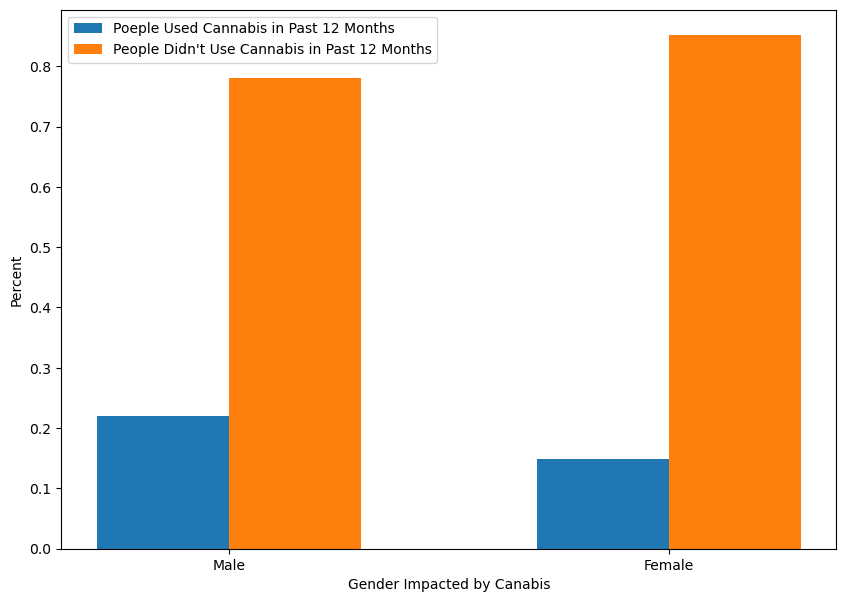

In [402]:
plt.figure(figsize=(10,7))
plt.bar(df5_cansex['DHH_SEX'].unique(),df5_cansex['proportion'][::2],width=0.3,label='Poeple Used Cannabis in Past 12 Months')
plt.bar(df5_cansex['DHH_SEX'].unique()+0.3,df5_cansex['proportion'][1::2],width=0.3, label="People Didn't Use Cannabis in Past 12 Months")
plt.xticks(df5_cansex['DHH_SEX'].unique()+0.3/2,('Male','Female'))
plt.xlabel('Gender Impacted by Canabis')
plt.ylabel('Percent')
plt.legend()
plt.show()

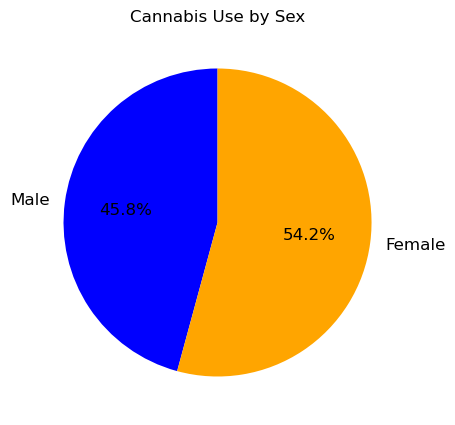

In [380]:
cannabis_sex_data=df_q5[['CAN_015', 'DHH_SEX']].dropna()
cannabis_sex=cannabis_sex_data.groupby('DHH_SEX')['CAN_015'].sum()
DHH_SEX_labels={
    1: "Male",
    2: "Female"
}
cannabis_sex.index=cannabis_sex.index.map(DHH_SEX_labels)

plt.figure(figsize=(5,5))
cannabis_sex.plot(kind='pie',autopct='%1.1f%%',colors=['blue','orange'],startangle=90,textprops={'fontsize':12})
plt.title('Cannabis Use by Sex')
plt.ylabel('')  
plt.show()

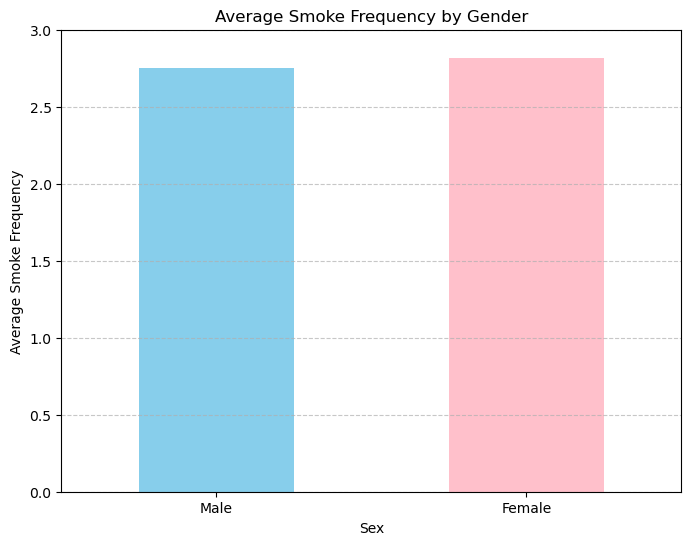

In [378]:
smoke_sex=df_q5[['SMK_005', 'DHH_SEX']].dropna()
smoke_sex=smoke_sex.groupby('DHH_SEX')['SMK_005'].mean()
DHH_SEX_labels={
    1: "Male",
    2: "Female"
}
smoke_sex.index=smoke_sex.index.map(DHH_SEX_labels)

plt.figure(figsize=(8,6))
plt.ylim(0,3)
smoke_sex.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Average Smoke Frequency by Gender')
plt.xlabel('Sex')
plt.ylabel('Average Smoke Frequency')
plt.xticks(rotation=0)  
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

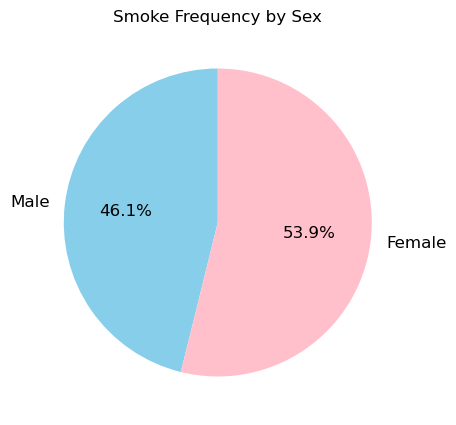

In [376]:
smoking_sex=df_q5[['SMK_005', 'DHH_SEX']].dropna()
smoking_bysex=smoking_sex.groupby('DHH_SEX')['SMK_005'].sum()
DHH_SEX_labels={
    1: "Male",
    2: "Female"
}
smoking_bysex.index=smoking_bysex.index.map(DHH_SEX_labels)

plt.figure(figsize=(5, 5))
smoking_bysex.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90, textprops={'fontsize': 12})
plt.title('Smoke Frequency by Sex')
plt.ylabel('')  
plt.show()

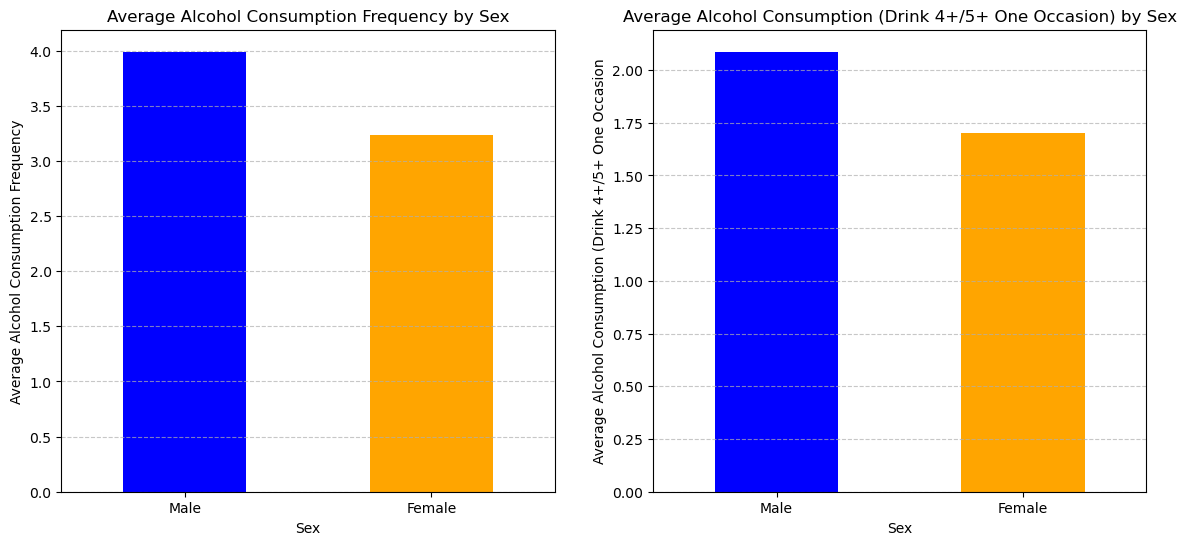

In [374]:
alcohol_sex=df_q5[['ALC_015', 'ALC_020', 'DHH_SEX']].dropna()
alc_015_bysex=alcohol_sex.groupby('DHH_SEX')['ALC_015'].mean()
alc_020_bysex=alcohol_sex.groupby('DHH_SEX')['ALC_020'].mean()
DHH_SEX_labels={
    1: "Male",
    2: "Female"
}
alc_015_bysex.index=alc_015_bysex.index.map(DHH_SEX_labels)
alc_020_bysex.index=alc_020_bysex.index.map(DHH_SEX_labels)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)  
alc_015_bysex.plot(kind='bar',color=['blue','orange'])
plt.title('Average Alcohol Consumption Frequency by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Alcohol Consumption Frequency')
plt.xticks(rotation=0)  
plt.grid(axis='y',linestyle='--',alpha=0.7)

plt.subplot(1,2,2) 
alc_020_bysex.plot(kind='bar',color=['blue','orange'])
plt.title('Average Alcohol Consumption (Drink 4+/5+ One Occasion) by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Alcohol Consumption (Drink 4+/5+ One Occasion')
plt.xticks(rotation=0)  
plt.grid(axis='y',linestyle='--',alpha=0.7)

In [62]:
df5_smksex=df_q5.groupby('DHH_SEX', as_index=False)['SMK_005'].value_counts(normalize=True,sort=False)
display(df5_smksex)

,DHH_SEX,SMK_005,proportion
0,1.0,1.0,0.109830
1,1.0,2.0,0.030380
2,1.0,3.0,0.859791
3,2.0,1.0,0.083141
4,2.0,2.0,0.017034
5,2.0,3.0,0.899824


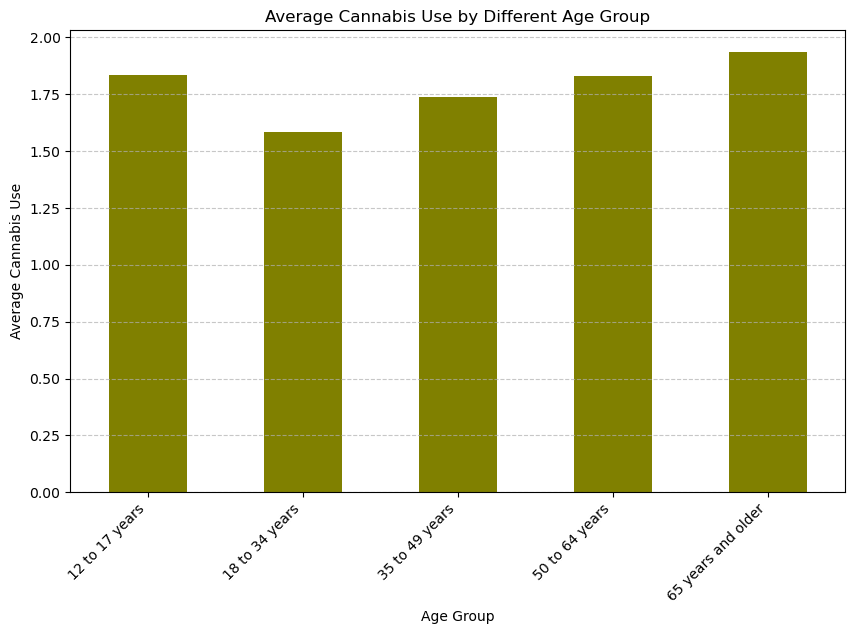

In [404]:
data_filtered=df_q5[['CAN_015', 'DHHGAGE']].dropna()
cannabis_use_different_age=data_filtered.groupby('DHHGAGE')['CAN_015'].mean()
DHHGAGE_labels={
    1: '12 to 17 years',
    2: '18 to 34 years',
    3: '35 to 49 years',
    4: '50 to 64 years',
    5: '65 years and older'
}
cannabis_use_different_age.index=cannabis_use_different_age.index.map(DHHGAGE_labels)

plt.figure(figsize=(10,6))
cannabis_use_different_age.plot(kind='bar',color='olive')
plt.title('Average Cannabis Use by Different Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cannabis Use')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

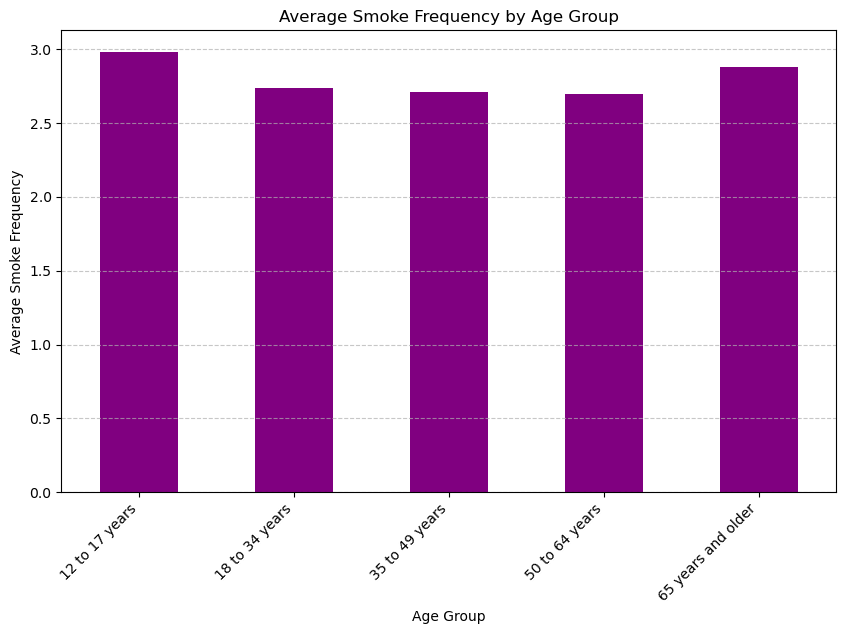

In [406]:
smoke_data_filtered=df_q5[['SMK_005', 'DHHGAGE']].dropna()
smoke_byage=smoke_data_filtered.groupby('DHHGAGE')['SMK_005'].mean()
DHHGAGE_labels={
    1: "12 to 17 years",
    2: "18 to 34 years",
    3: "35 to 49 years",
    4: "50 to 64 years",
    5: "65 years and older"
}
smoke_byage.index=smoke_byage.index.map(DHHGAGE_labels)

plt.figure(figsize=(10,6))
smoke_byage.plot(kind='bar',color='purple')
plt.title('Average Smoke Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Smoke Frequency')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

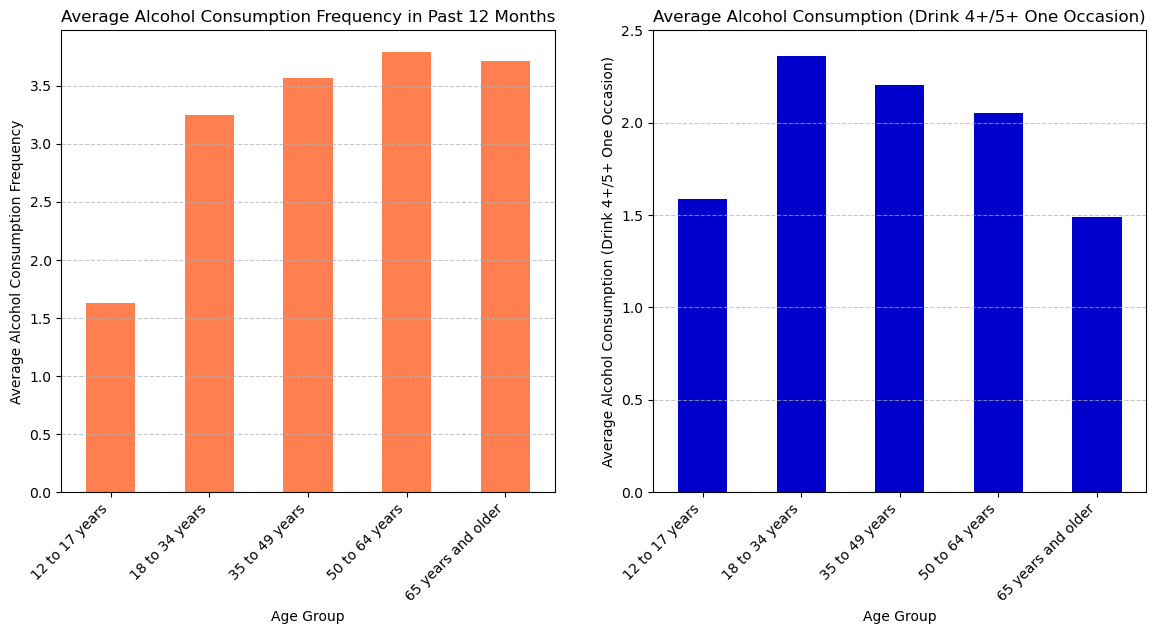

In [426]:
alcohol_data_filtered=df_q5[['ALC_015', 'ALC_020', 'DHHGAGE']].dropna()
alc_015_by_age=alcohol_data_filtered.groupby('DHHGAGE')['ALC_015'].mean()
alc_020_by_age=alcohol_data_filtered.groupby('DHHGAGE')['ALC_020'].mean()
DHHGAGE_labels={
    1: "12 to 17 years",
    2: "18 to 34 years",
    3: "35 to 49 years",
    4: "50 to 64 years",
    5: "65 years and older"
}
alc_015_by_age.index=alc_015_by_age.index.map(DHHGAGE_labels)
alc_020_by_age.index=alc_020_by_age.index.map(DHHGAGE_labels)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)  
alc_015_by_age.plot(kind='bar',color='coral')
plt.title('Average Alcohol Consumption Frequency in Past 12 Months')
plt.xlabel('Age Group')
plt.ylabel('Average Alcohol Consumption Frequency')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)

plt.subplot(1,2,2) 
plt.ylim(0,2.5)
alc_020_by_age.plot(kind='bar',color='mediumblue')
plt.title('Average Alcohol Consumption (Drink 4+/5+ One Occasion)')
plt.xlabel('Age Group')
plt.ylabel('Average Alcohol Consumption (Drink 4+/5+ One Occasion)')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)

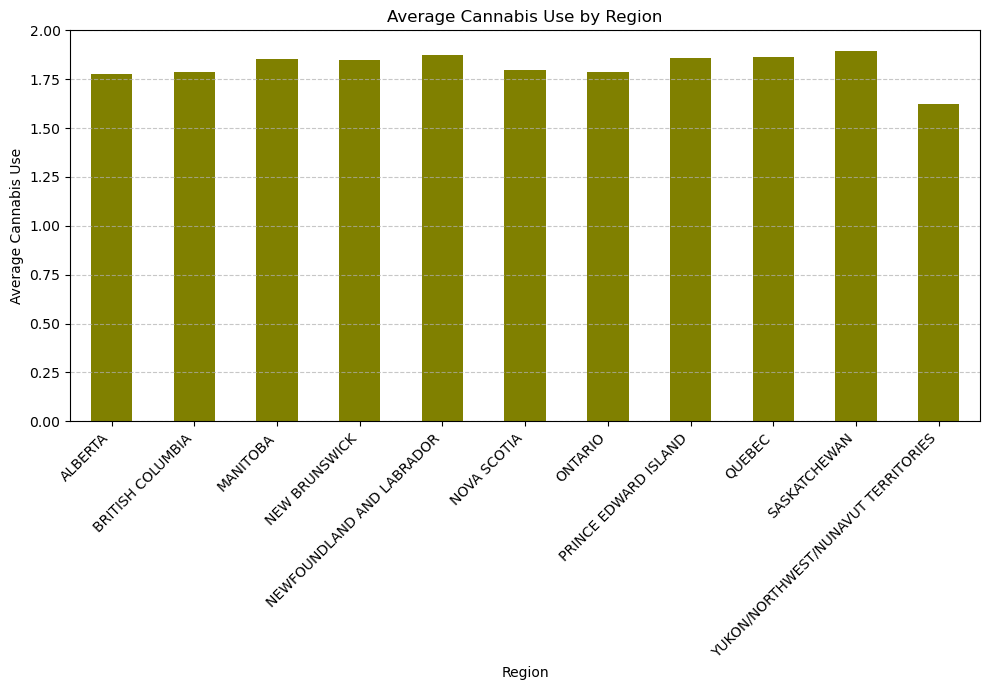

In [428]:
cannabis_region=df_q5[['CAN_015', 'GEOGPRV']].dropna()
GEOGPRV_labels={
    10: "NEWFOUNDLAND AND LABRADOR",
    11: "PRINCE EDWARD ISLAND",
    12: "NOVA SCOTIA",
    13: "NEW BRUNSWICK",
    24: "QUEBEC",
    35: "ONTARIO",
    46: "MANITOBA",
    47: "SASKATCHEWAN",
    48: "ALBERTA",
    59: "BRITISH COLUMBIA",
    60: "YUKON/NORTHWEST/NUNAVUT TERRITORIES"
}
cannabis_region['GEOGPRV']=cannabis_region['GEOGPRV'].map(GEOGPRV_labels)
cannabis_byregion=cannabis_region.groupby('GEOGPRV')['CAN_015'].mean()

plt.figure(figsize=(10,7))
plt.ylim(0,2)
cannabis_byregion.plot(kind='bar', color='olive')
plt.title('Average Cannabis Use by Region')
plt.xlabel('Region')
plt.ylabel('Average Cannabis Use')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

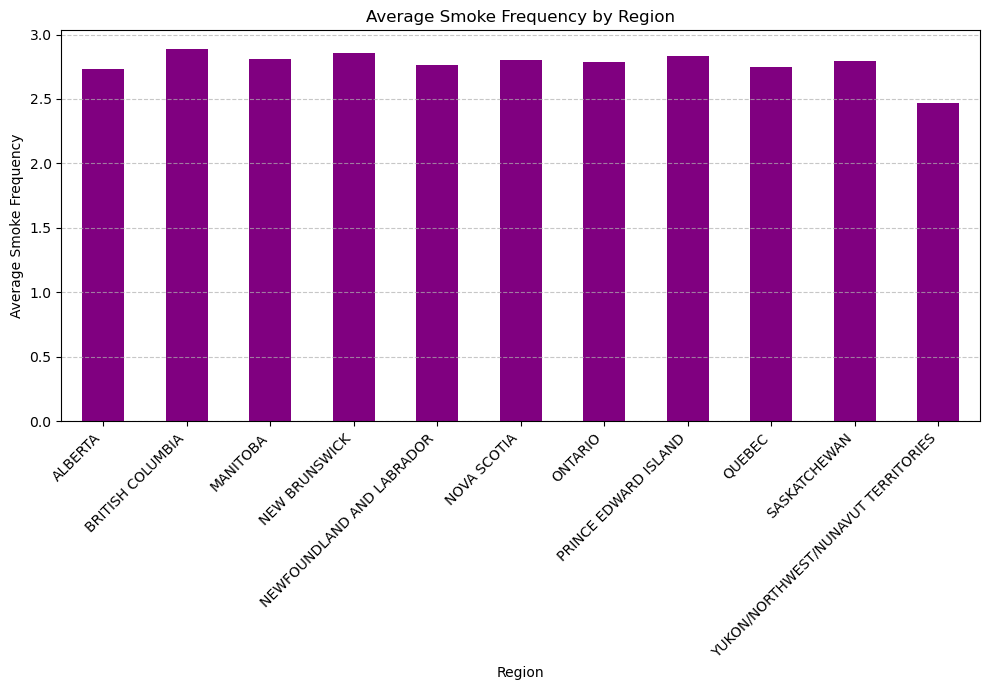

In [430]:
smoke_region=df_q5[['SMK_005', 'GEOGPRV']].dropna()
GEOGPRV_labels={
    10: "NEWFOUNDLAND AND LABRADOR",
    11: "PRINCE EDWARD ISLAND",
    12: "NOVA SCOTIA",
    13: "NEW BRUNSWICK",
    24: "QUEBEC",
    35: "ONTARIO",
    46: "MANITOBA",
    47: "SASKATCHEWAN",
    48: "ALBERTA",
    59: "BRITISH COLUMBIA",
    60: "YUKON/NORTHWEST/NUNAVUT TERRITORIES"
}
smoke_region['GEOGPRV']=smoke_region['GEOGPRV'].map(GEOGPRV_labels)
smoke_byregion=smoke_region.groupby('GEOGPRV')['SMK_005'].mean()

plt.figure(figsize=(10,7))
smoke_byregion.plot(kind='bar',color='purple')
plt.title('Average Smoke Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Average Smoke Frequency')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

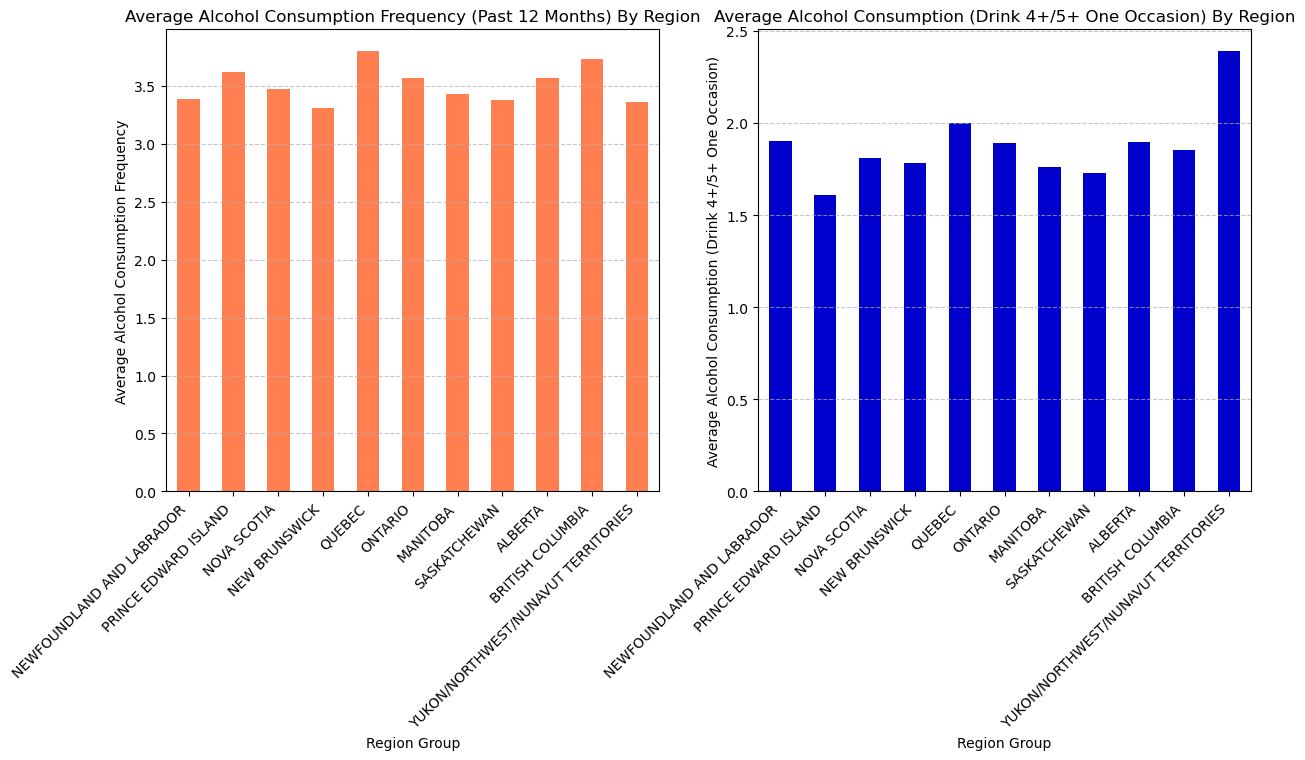

In [434]:
alcohol_data_filtered=df_q5[['ALC_015', 'ALC_020', 'GEOGPRV']].dropna()
alc_015_region=alcohol_data_filtered.groupby('GEOGPRV')['ALC_015'].mean()
alc_020_region=alcohol_data_filtered.groupby('GEOGPRV')['ALC_020'].mean()
GEOGPRV_labels={
    10: "NEWFOUNDLAND AND LABRADOR",
    11: "PRINCE EDWARD ISLAND",
    12: "NOVA SCOTIA",
    13: "NEW BRUNSWICK",
    24: "QUEBEC",
    35: "ONTARIO",
    46: "MANITOBA",
    47: "SASKATCHEWAN",
    48: "ALBERTA",
    59: "BRITISH COLUMBIA",
    60: "YUKON/NORTHWEST/NUNAVUT TERRITORIES"
}
alc_015_region.index=alc_015_region.index.map(GEOGPRV_labels)
alc_020_region.index=alc_020_region.index.map(GEOGPRV_labels)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)  
alc_015_region.plot(kind='bar',color='coral')
plt.title('Average Alcohol Consumption Frequency (Past 12 Months) By Region')
plt.xlabel('Region Group')
plt.ylabel('Average Alcohol Consumption Frequency')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)

plt.subplot(1,2,2)  
alc_020_region.plot(kind='bar',color='mediumblue')
plt.title('Average Alcohol Consumption (Drink 4+/5+ One Occasion) By Region')
plt.xlabel('Region Group')
plt.ylabel('Average Alcohol Consumption (Drink 4+/5+ One Occasion)')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)

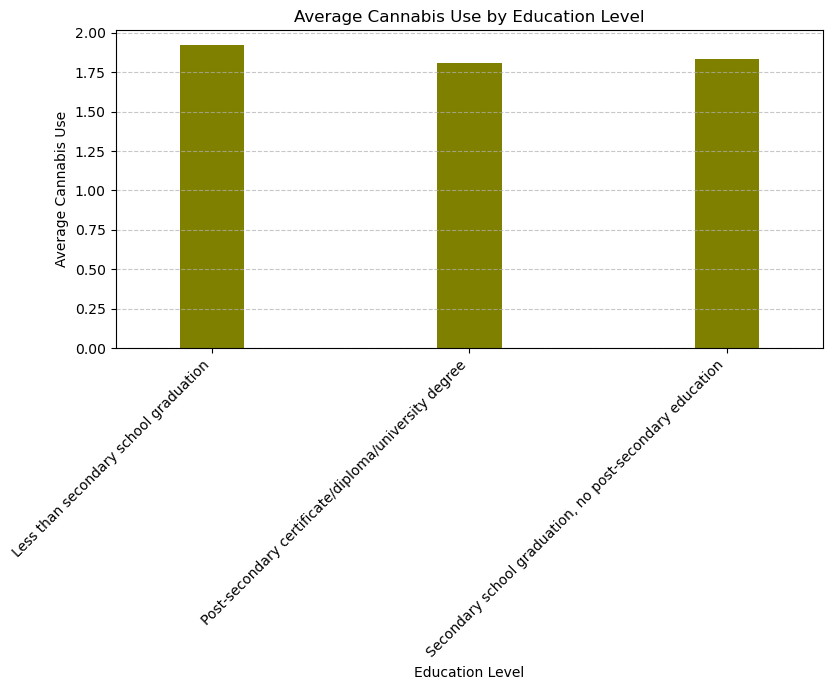

In [436]:
cannabis_education=df_q5[['CAN_015', 'EHG2DVH3']].dropna()
EHG2DVH3_labels={
    1: "Less than secondary school graduation",
    2: "Secondary school graduation, no post-secondary education",
    3: "Post-secondary certificate/diploma/university degree"
}
cannabis_education['EHG2DVH3']=cannabis_education['EHG2DVH3'].map(EHG2DVH3_labels)
cannabis_education=cannabis_education.groupby('EHG2DVH3')['CAN_015'].mean()

plt.figure(figsize=(8.5,7))
cannabis_education.plot(kind='bar',color='olive',width=0.25)
plt.title('Average Cannabis Use by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Cannabis Use')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

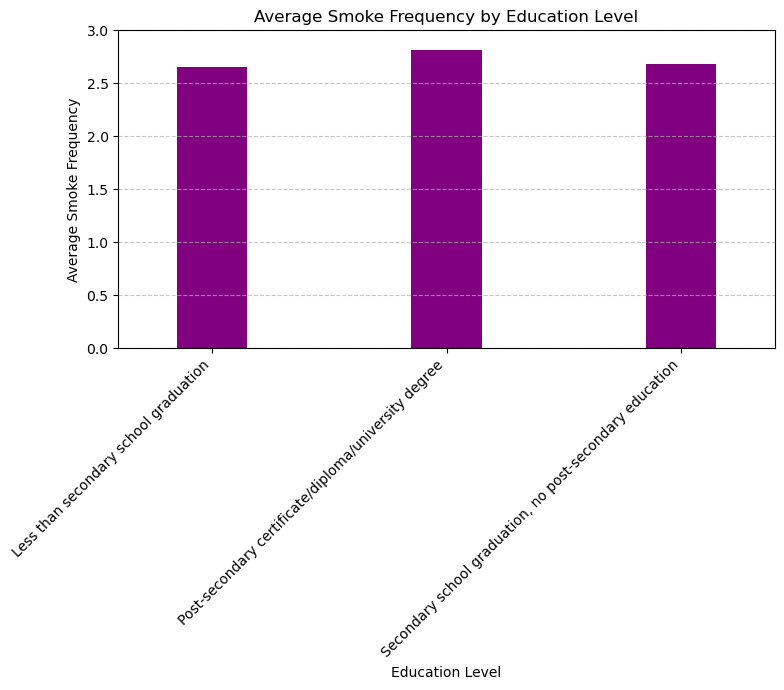

In [438]:
smoke_education=df_q5[['SMK_005', 'EHG2DVH3']].dropna()
EHG2DVH3_labels={
    1: "Less than secondary school graduation",
    2: "Secondary school graduation, no post-secondary education",
    3: "Post-secondary certificate/diploma/university degree"
}
smoke_education['EHG2DVH3']=smoke_education['EHG2DVH3'].map(EHG2DVH3_labels)
smoke_education=smoke_education.groupby('EHG2DVH3')['SMK_005'].mean()

plt.figure(figsize=(8, 7))
plt.ylim(0,3)
smoke_education.plot(kind='bar', color='purple', width=0.3)
plt.title('Average Smoke Frequency by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Smoke Frequency')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

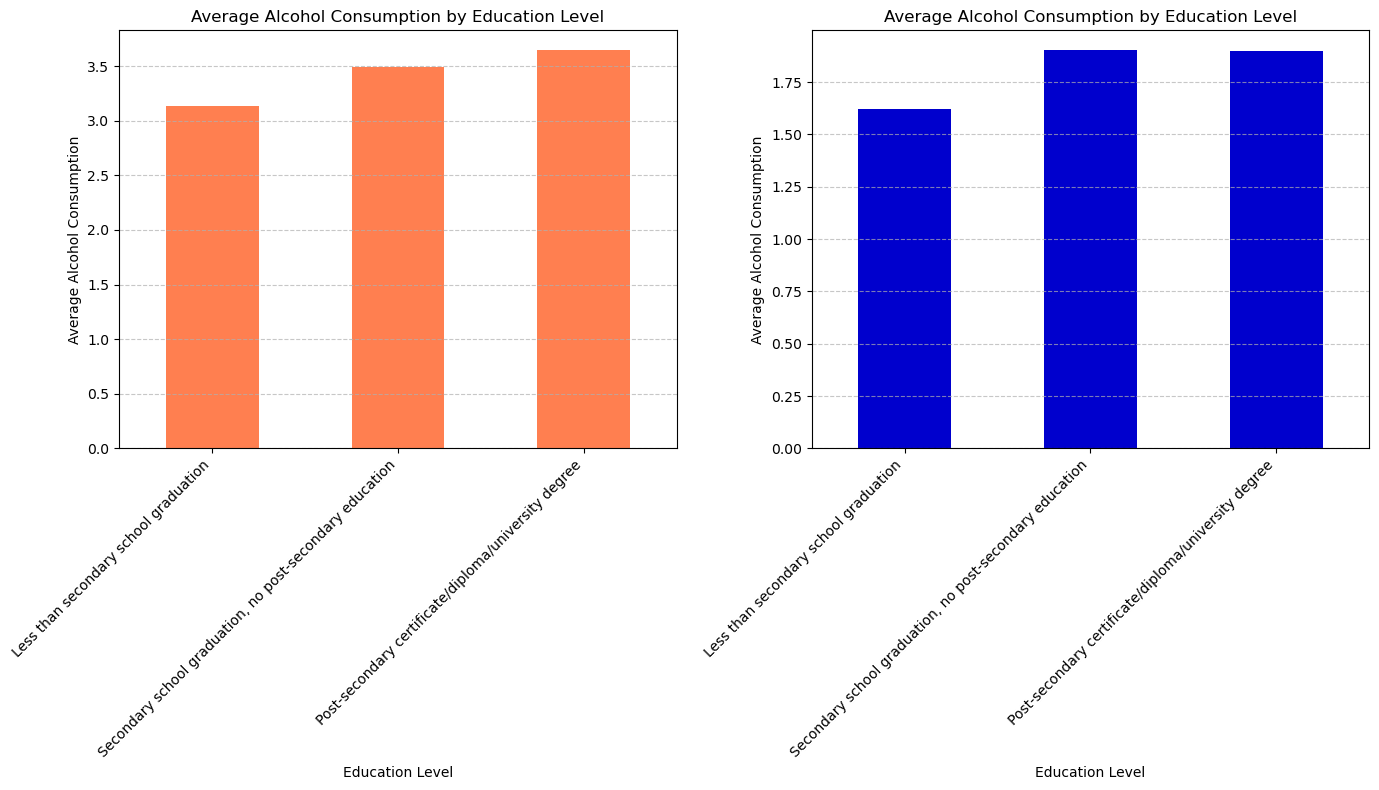

In [442]:
alcohol_education=df_q5[['ALC_015', 'ALC_020', 'EHG2DVH3']].dropna()
alc_015_education=alcohol_education.groupby('EHG2DVH3')['ALC_015'].mean()
alc_020_education=alcohol_education.groupby('EHG2DVH3')['ALC_020'].mean()

EHG2DVH3_labels={
    1: "Less than secondary school graduation",
    2: "Secondary school graduation, no post-secondary education",
    3: "Post-secondary certificate/diploma/university degree"
}
alc_015_education.index=alc_015_education.index.map(EHG2DVH3_labels)
alc_020_education.index=alc_020_education.index.map(EHG2DVH3_labels)

plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
alc_015_education.plot(kind='bar',color='coral')
plt.title('Average Alcohol Consumption by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)

plt.subplot(1,2,2)
alc_020_education.plot(kind='bar',color='mediumblue')
plt.title('Average Alcohol Consumption by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()